In [4]:
import numpy as np
import pandas as pd
import os

# Set the correct local path for Apple_scab images
category_path = r"C:\Users\ROHIT\Downloads\Apple___Apple_scab"

image_paths = []
labels = []

# Collect image paths and labels
for image_name in os.listdir(category_path):
    image_path = os.path.join(category_path, image_name)
    image_paths.append(image_path)
    labels.append("Apple_scab")

# Create the DataFrame
df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

df.head()


,image_path,label
0,C:\Users\ROHIT\Downloads\Apple___Apple_scab\00...,Apple_scab
1,C:\Users\ROHIT\Downloads\Apple___Apple_scab\01...,Apple_scab
2,C:\Users\ROHIT\Downloads\Apple___Apple_scab\01...,Apple_scab
3,C:\Users\ROHIT\Downloads\Apple___Apple_scab\01...,Apple_scab
4,C:\Users\ROHIT\Downloads\Apple___Apple_scab\01...,Apple_scab


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
# Local path to Apple_scab images
image_dir = r"C:\Users\ROHIT\Downloads\Apple___Apple_scab"

image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
labels = ["Apple_scab"] * len(image_paths)

df = pd.DataFrame({"image_path": image_paths, "label": labels})


In [7]:
img_height, img_width = 128, 128
batch_size = 32

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_dataframe(
    train_df, x_col='image_path', y_col='label',
    target_size=(img_height, img_width), class_mode='categorical', batch_size=batch_size
)

val_gen = datagen.flow_from_dataframe(
    val_df, x_col='image_path', y_col='label',
    target_size=(img_height, img_width), class_mode='categorical', batch_size=batch_size
)


Found 1612 validated image filenames belonging to 1 classes.
Found 404 validated image filenames belonging to 1 classes.


In [8]:
class ContinuousLayer(layers.Layer):
    def __init__(self, units=64):
        super(ContinuousLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel", shape=[int(input_shape[-1]), self.units])
        self.bias = self.add_weight("bias", shape=[self.units])

    def call(self, inputs):
        return tf.math.sin(tf.matmul(inputs, self.kernel) + self.bias)


In [11]:
class ContinuousLayer(layers.Layer):
    def __init__(self, units=64):
        super(ContinuousLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.kernel = self.add_weight(name="kernel", shape=(int(input_shape[-1]), self.units))
        self.bias = self.add_weight(name="bias", shape=(self.units,))

    def call(self, inputs):
        return tf.math.sin(tf.matmul(inputs, self.kernel) + self.bias)


In [14]:
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    ContinuousLayer(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_gen, epochs=10, validation_data=val_gen)


C:\Users\ROHIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 43s 795ms/step - accuracy: 0.8408 - loss: 0.2197 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 15s 291ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 8.4187e-04
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 15s 301ms/step - accuracy: 1.0000 - loss: 9.4723e-04 - val_accuracy: 1.0000 - val_loss: 4.4266e-04
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 15s 291ms/step - accuracy: 1.0000 - loss: 4.3356e-04 - val_accuracy: 1.0000 - val_loss: 2.6057e-04
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 262ms/step - accuracy: 1.0000 - loss: 3.0479e-04 - val_accuracy: 1.0000 - val_loss: 2.1471e-04
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 267ms/step - accuracy: 1.0000 - loss: 2.4838e-04 - val_accuracy: 1.0000 - val_loss: 1.4765e-04
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 262ms/step - accuracy: 1.0000 - loss: 1.8189e-04 - val_accuracy: 1.0000 - val_loss: 1.1477e-04
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 262ms/step 

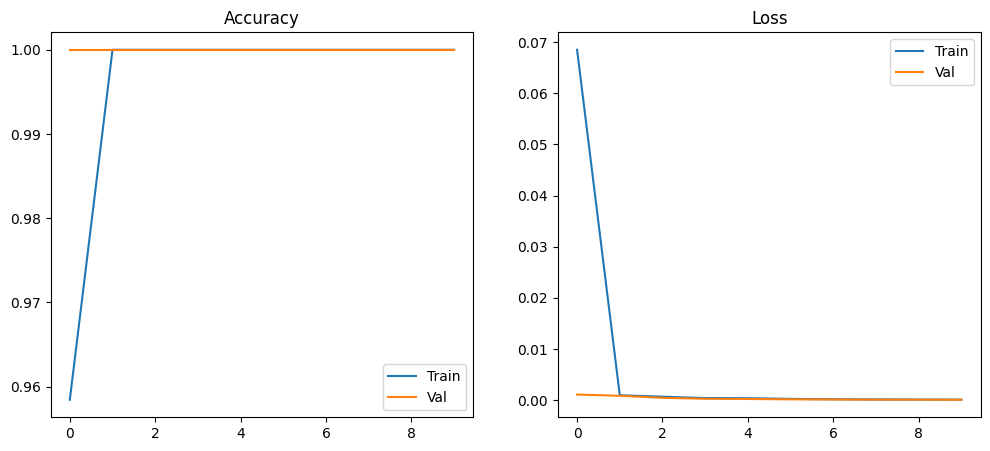

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step 


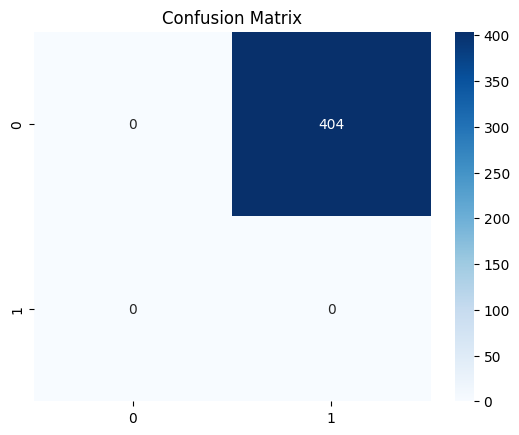

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     404.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     404.0
   macro avg       0.00      0.00      0.00     404.0
weighted avg       0.00      0.00      0.00     404.0



C:\Users\ROHIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ROHIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ROHIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [16]:
# Accuracy & Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()
plt.show()

# Confusion Matrix
val_preds = model.predict(val_gen)
val_labels = val_gen.classes
cm = confusion_matrix(val_labels, (val_preds > 0.5).astype(int))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(val_labels, (val_preds > 0.5).astype(int)))
